In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
import scipy.signal as ss
np.random.seed(1024)

In [2]:
freqs = np.linspace(0.1,0.2,num=203)
delays = np.fft.fftfreq(len(freqs),d=np.diff(freqs)[0])*u.ns
freqs *= u.GHz
lam = (c.c/freqs).to(u.m)

In [3]:
bandpass = np.sin(200*freqs.value) + np.sin(340*freqs.value) + 1
skypower = 5*np.power(freqs,-2.55)
polfrac = 0.02
visI = skypower*bandpass
visQ = polfrac*visI
eor = 10*np.abs(np.random.normal(1e-2,1e-2,203))
visEoR = eor*bandpass

In [4]:
rotmeas = 500*(1/u.m**2)
visQrot = visQ*np.exp(2j*rotmeas*(lam**2))
q2i_di = 0.01
visQrotleak = visQrot*q2i_di

In [5]:
w = ss.blackmanharris(203)
_visI = np.fft.fftshift(np.fft.ifft(w*visI))
_visQ = np.fft.fftshift(np.fft.ifft(w*visQ))
_visEoR = np.fft.fftshift(np.fft.ifft(w*visEoR))
_visQrot = np.fft.fftshift(np.fft.ifft(w*visQrot))
_visQrotleak = np.fft.fftshift(np.fft.ifft(w*visQrotleak))

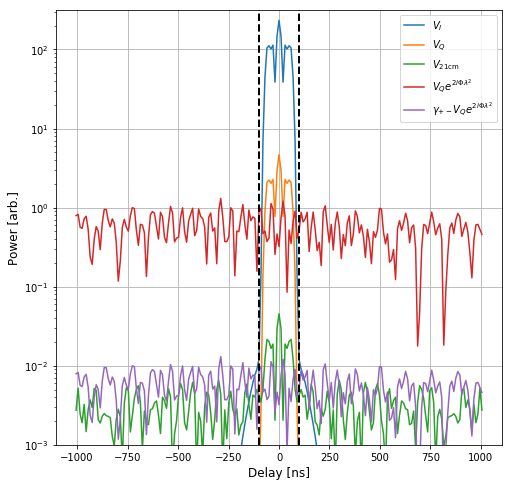

In [11]:
plt.figure(figsize=(8,8))
plt.plot(np.fft.fftshift(delays),np.abs(_visI),label=r'$V_I$')
plt.plot(np.fft.fftshift(delays),np.abs(_visQ),label=r'$V_Q$')
plt.plot(np.fft.fftshift(delays),np.abs(_visEoR),label=r'$V_{\rm 21cm}$')
plt.plot(np.fft.fftshift(delays),np.abs(_visQrot),label=r'$V_Qe^{2i\Phi\lambda^2}$')
plt.plot(np.fft.fftshift(delays),np.abs(_visQrotleak),label=r'$\gamma_{+-}V_Qe^{2i\Phi\lambda^2}$')
plt.legend()
plt.yscale('log')
plt.ylim(1e-3,10**2.5)
plt.axvline(100,linewidth=2,color='k',linestyle='--')
plt.axvline(-100,linewidth=2,color='k',linestyle='--')
plt.grid()
plt.xlabel('Delay [ns]',size=12)
plt.ylabel('Power [arb.]',size=12)
plt.savefig('/Users/saulkohn/Desktop/I_Q_21_Qrot_QrotLeak.png')

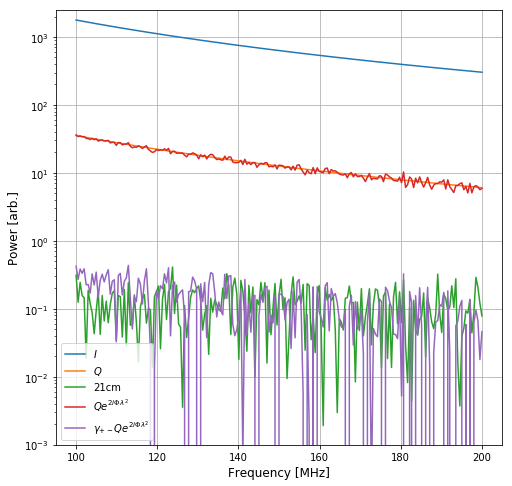

In [20]:
plt.figure(figsize=(8,8))
plt.plot(freqs*1000,np.abs(visI/bandpass),label=r'$I$')
plt.plot(freqs*1000,np.abs(visQ/bandpass),label=r'$Q$')
plt.plot(freqs*1000,np.abs(visEoR/bandpass),label=r'21cm')
#why is this not looking right? -- because the noise is small compared to bandpass structure
extra_noise = np.random.normal(0,1,203)
p1 = np.abs(visQrot/bandpass).value+extra_noise
p2 = np.abs(visQrotleak/bandpass).value+0.1*extra_noise
plt.plot(freqs*1000,p1,label=r'$Qe^{2i\Phi\lambda^2}$')
plt.plot(freqs*1000,p2,label=r'$\gamma_{+-}Qe^{2i\Phi\lambda^2}$')
plt.legend(loc=3)
plt.yscale('log')
plt.xlabel('Frequency [MHz]',size=12)
plt.ylabel('Power [arb.]',size=12)
plt.grid()
plt.ylim(1e-3,2500)
#plt.savefig('vis_divBp_1pctDIleak_RM500.png')
plt.savefig('/Users/saulkohn/specI_Q_21_Qrot_QrotLeak.png')